In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housingDf = pd.read_csv(r'C:\Users\mmack\OneDrive\Documents\ML\Hands-on-Machine-Learning\House Price Regression\housing.csv')
housingDf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housingDf.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housingDf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


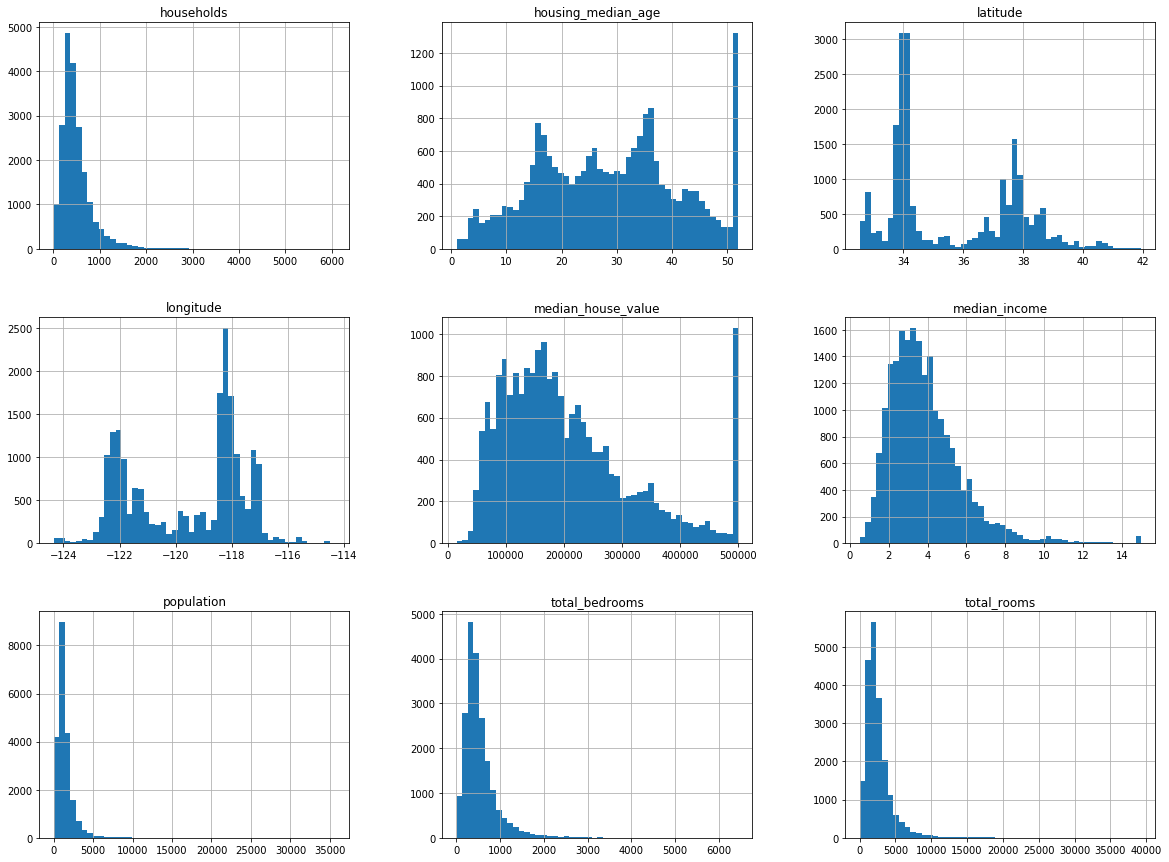

In [6]:
housingDf.hist(bins = 50, figsize = (20,15))
plt.show()

In [7]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
train_set, test_set = split_train_test(housingDf, 0.2)
print('Train set contains ' + str(len(train_set)) + ' points')
print('Test set contains ' + str(len(test_set)) + ' points')

Train set contains 16512 points
Test set contains 4128 points


In [9]:
housingDf["income_cat"] = pd.cut(housingDf.median_income, bins = [0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1,2,3,4,5])

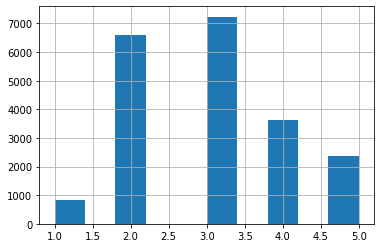

In [10]:
housingDf.income_cat.hist()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housingDf, housingDf.income_cat):
    strat_train_set = housingDf.loc[train_index]
    strat_test_set = housingDf.loc[test_index]

In [13]:
strat_test_set.income_cat.value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [14]:
strat_train_set.drop("income_cat", axis = 1, inplace = True)
strat_test_set.drop("income_cat", axis = 1, inplace = True)

In [15]:
housing = strat_train_set.copy()

No handles with labels found to put in legend.


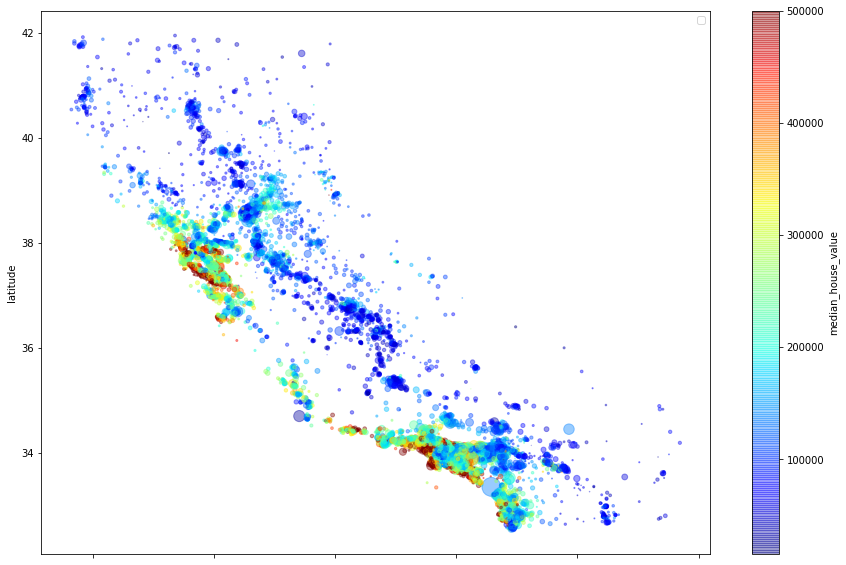

In [16]:
housing.plot(kind = 'scatter',
             x = "longitude",
             y = 'latitude',
             alpha = 0.4,
             s = housing["population"]/100,
             c="median_house_value",
             cmap = plt.get_cmap("jet"),
             colorbar = True,
             figsize = (15,10))
plt.legend()

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [19]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021097AD5B08>,
      dtype=object)

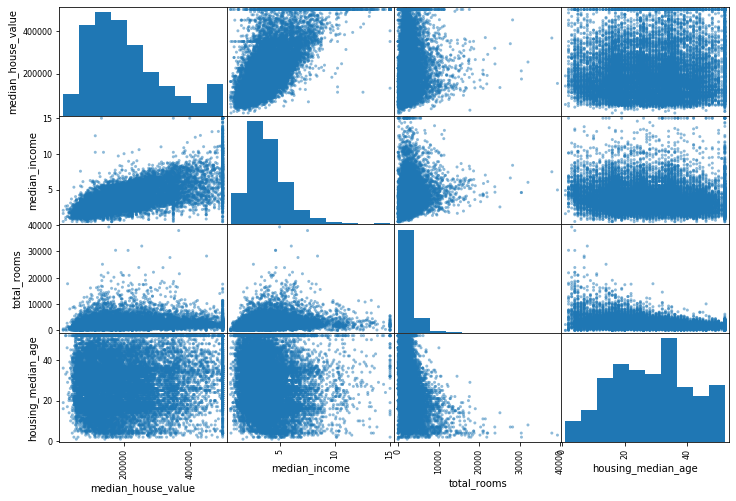

In [20]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12,8))

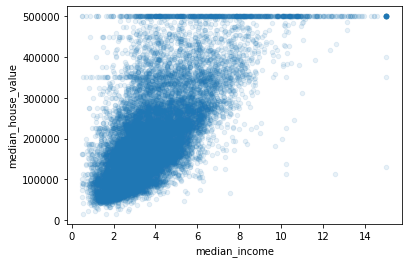

In [21]:
housing.plot(kind = "scatter",
            x = "median_income",
            y = "median_house_value",
            alpha = 0.1)

In [22]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [26]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set.median_house_value.copy()

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
imputer = SimpleImputer(strategy = "median")

In [29]:
housing_num = housing.drop("ocean_proximity", axis = 1)

In [30]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [31]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [34]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [35]:
x = imputer.transform(housing_num)

In [36]:
housing_tr = pd.DataFrame(x, columns = housing_num.columns, index = housing_num.index)

In [42]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [43]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [46]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [47]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [54]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [61]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [62]:
housing_extra_attribs[:10]

array([[-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
        '<1H OCEAN', 4.625368731563422, 2.094395280235988],
       [-121.93, 37.05, 14.0, 679.0, 108.0, 306.0, 113.0, 6.4214,
        '<1H OCEAN', 6.008849557522124, 2.7079646017699117],
       [-117.2, 32.77, 31.0, 1952.0, 471.0, 936.0, 462.0, 2.8621,
        'NEAR OCEAN', 4.225108225108225, 2.0259740259740258],
       [-119.61, 36.31, 25.0, 1847.0, 371.0, 1460.0, 353.0, 1.8839,
        'INLAND', 5.232294617563739, 4.135977337110481],
       [-118.59, 34.23, 17.0, 6592.0, 1525.0, 4459.0, 1463.0, 3.0347,
        '<1H OCEAN', 4.50580997949419, 3.047846889952153],
       [-120.97, 37.66, 24.0, 2930.0, 588.0, 1448.0, 570.0, 3.5395,
        'INLAND', 5.140350877192983, 2.5403508771929824],
       [-118.5, 34.04, 52.0, 2233.0, 317.0, 769.0, 277.0, 8.3839,
        '<1H OCEAN', 8.061371841155236, 2.776173285198556],
       [-117.24, 34.15, 26.0, 2041.0, 293.0, 936.0, 375.0, 6.0, 'INLAND',
        5.442666666666667, 2.496],
   

In [56]:
from sklearn.preprocessing import StandardScaler

In [55]:
from sklearn.pipeline import Pipeline

In [65]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = "median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())])

In [66]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [67]:
housing_num_tr[:10]

array([[-1.15604281e+00,  7.71949616e-01,  7.43330892e-01,
        -4.93233934e-01, -4.45438207e-01, -6.36211407e-01,
        -4.20698422e-01, -6.14937444e-01, -3.12054519e-01,
        -8.64987054e-02,  1.55317530e-01],
       [-1.17602483e+00,  6.59694795e-01, -1.16531720e+00,
        -9.08966554e-01, -1.03692780e+00, -9.98331347e-01,
        -1.02222705e+00,  1.33645936e+00,  2.17683377e-01,
        -3.35339129e-02, -8.36289016e-01],
       [ 1.18684903e+00, -1.34218285e+00,  1.86641864e-01,
        -3.13659889e-01, -1.53344583e-01, -4.33639362e-01,
        -9.33177983e-02, -5.32045602e-01, -4.65315160e-01,
        -9.24049941e-02,  4.22200402e-01],
       [-1.70676728e-02,  3.13575763e-01, -2.90520160e-01,
        -3.62762167e-01, -3.96755937e-01,  3.60409561e-02,
        -3.83435587e-01, -1.04556555e+00, -7.96612428e-02,
         8.97356110e-02, -1.96453142e-01],
       [ 4.92473835e-01, -6.59299356e-01, -9.26736191e-01,
         1.85619316e+00,  2.41221109e+00,  2.72415407e+00,
  

In [68]:
from sklearn.compose import ColumnTransformer

In [69]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [70]:
housing_prepared = full_pipeline.fit_transform(housing)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [76]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [77]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [82]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [83]:
from sklearn.model_selection import cross_val_score

In [86]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [89]:
def display_scores(scores):
    print("scores:", scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:", scores.std())

In [90]:
display_scores(tree_rmse_scores)

scores: [69598.08323937 66805.43807461 68882.99291157 69819.68432063
 71414.47204092 74674.31126142 70697.03666872 70211.41877322
 74995.84107534 68284.63025317]
Mean: 70538.39086189738
Standard Deviation: 2470.4196144081484


In [92]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation: 2731.67400179835


In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [98]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18594.582279967133

In [114]:
forest_scores = cross_val_score(forest_reg,
                                housing_prepared,
                                housing_labels,
                                scoring = "neg_mean_squared_error",
                                cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

KeyboardInterrupt: 

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

In [108]:
forest_red = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [103]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [104]:
cvres = grid_search.cv_results_

In [105]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63684.31056802605 {'max_features': 2, 'n_estimators': 3}
55682.82977958645 {'max_features': 2, 'n_estimators': 10}
53078.1262374384 {'max_features': 2, 'n_estimators': 30}
59748.759095138375 {'max_features': 4, 'n_estimators': 3}
53243.91539357192 {'max_features': 4, 'n_estimators': 10}
50267.19821532161 {'max_features': 4, 'n_estimators': 30}
60219.48616773926 {'max_features': 6, 'n_estimators': 3}
51978.69179854803 {'max_features': 6, 'n_estimators': 10}
49965.64441579893 {'max_features': 6, 'n_estimators': 30}
58550.63459692315 {'max_features': 8, 'n_estimators': 3}
52030.268559327924 {'max_features': 8, 'n_estimators': 10}
49973.58659293215 {'max_features': 8, 'n_estimators': 30}
63026.569220520636 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54508.774164842514 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60419.39600862406 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52479.29786248514 {'bootstrap': False, 'max_features': 3, 'n_estimators':